### 8) 다중클래스의 ROC

In [2]:
import pandas as pd

df = pd.read_csv("c:/workspace3/data/iris.csv")
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [3]:
X=df[df.columns[:-2]]
y=df['Species']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_score = model.decision_function(X_test)

print(y_score[::20])
print(model.predict(X_test[::20]))

[[ 6.77639365  3.0296375  -9.80603115]
 [ 6.62628641  2.67678173 -9.30306813]]
[0 0]


In [6]:
from sklearn.metrics import confusion_matrix

y_hat=model.predict(X_test)
confusion_matrix(y_test, y_hat)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

In [7]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [8]:
#roc_curve() 함수는 이진분류에만 지원됨

from sklearn.metrics import roc_curve

# fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))
# fpr, tpr, thresholds
#다중 클래스에 대해서는 ROC Curve를 그릴 수 없으므로
#각각의 클래스에 대해 별도로 ROC Curve를 그려야 함
#y변수를 원핫인코딩한 리스트

from sklearn.preprocessing import label_binarize

y = label_binarize(y, classes=[0,1,2])
y[::20]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

{0: 1.0, 1: 0.475, 2: 1.0}


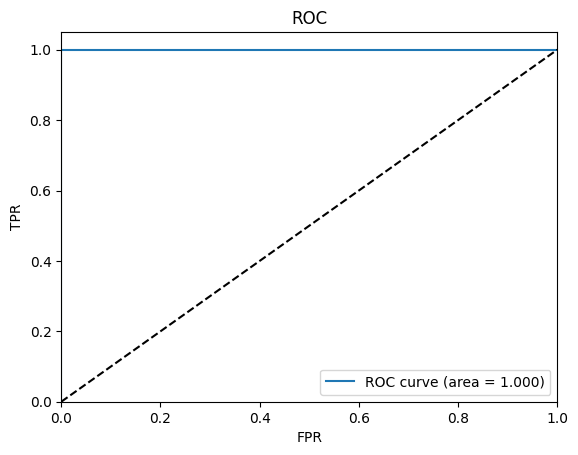

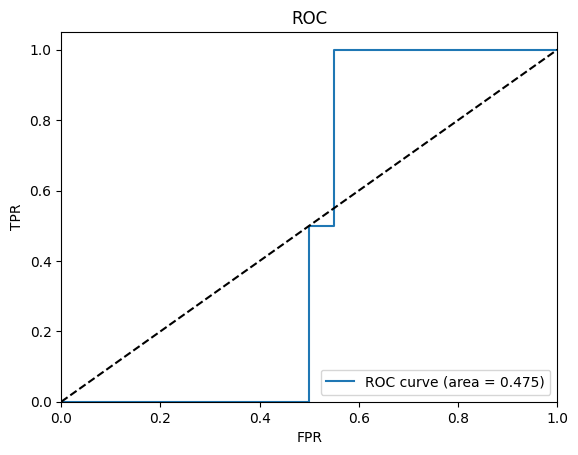

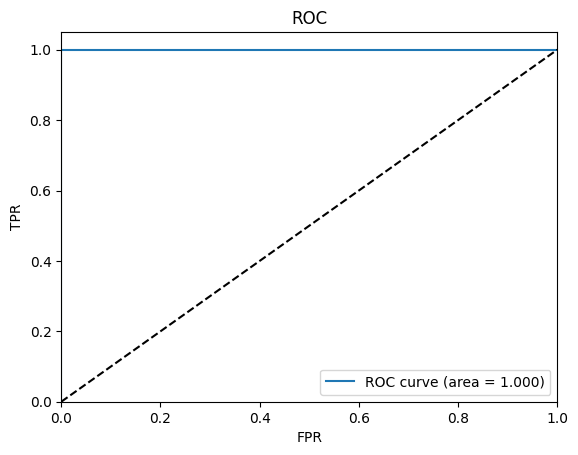

In [10]:
from sklearn.metrics import auc
import matplotlib.pyplot as plt

n_classes = 3

fpr = dict()
tpr = dict()
roc_auc = dict()

y_score = model.decision_function(X_test)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
print(roc_auc)    

for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %.3f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()